![imagen](./img/ejercicios.png)

# INFORMACIÓN DEL PROYECTO

In [261]:
import pandas as pd

### TÍTULO

### Generacion Eléctrica Global

### TEMA

### HIPÓTESIS

Voy a hacer un estudio por potencias de todas las centrales eléctricas del mundo. En las tablas está especificado el combustible que utilizan (gas, nuclear,carbon...), latitud,longitud...etc 
He sumado las potencia de cadat pais. De modo que el estudio se basa en la potencai total que genera cada país, para hacer un ranking. 
Tengo pensado hacer un gráfico detallado de España en particular con su mapa y uno general a nivel mundial. Y podríamos añadir un grafico de barras de los 5 primeros paises generadores detallando el cobustible que utilizan, para que se vea claramente el nombre del pais debajo y arriba cada pais con 3 o 4 barras q espeficique el porcentaje de combustible sobre el total generado. Por ejemplo: EEUU: 45% gas, 25% carbon, 20% nuclear, 10% renovables. Así con los 5 primeros paises del mundo.

## OBTENCIÓN DE LOS DATOS

he usado la web **World Resources Institute**. El conjunto de plataformas de datos de WRI está a la vanguardia de nuestro trabajo de datos. Estas plataformas permiten a los usuarios monitorear los cambios en los bosques casi en tiempo real, rastrear los impulsores del cambio climático, analizar los riesgos del agua en todo el mundo, examinar la sección transversal de los problemas ambientales globales y más.

Los datos son sacados de la web del **World Resources Institute** en formato Excel (CSV) del siguiente link:
https://datasets.wri.org/dataset/globalpowerplantdatabase

In [262]:
# Primer dataset
import json
import requests
import pandas as pd
import csv
import numpy as np
from pandas import DataFrame

df2 = pd.read_csv("global_power_plant_database.csv")
df2

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,fuel1,fuel2,fuel3,...,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,estimated_generation_gwh
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.00,32.3220,65.1190,Hydro,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.00,34.5560,69.4787,Hydro,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.00,34.6410,69.7170,Hydro,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,Nangarhar (Darunta) Hydroelectric Power Plant ...,GEODB0040536,11.55,34.4847,70.3633,Hydro,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,Northwest Kabul Power Plant Afghanistan,GEODB0040540,42.00,34.5638,69.1134,Gas,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28659,ZMB,Zambia,Ndola,WRI1022386,50.00,-12.9667,28.6333,Oil,NaN,NaN,...,ZESCO,Energy Regulation Board of Zambia,http://www.erb.org.zm/reports/EnergySectorRepo...,Power Africa,NaN,NaN,NaN,NaN,NaN,120.872642
28660,ZMB,Zambia,Nkana,WRI1022384,20.00,-12.8167,28.2000,Oil,NaN,NaN,...,ZESCO,Energy Regulation Board of Zambia,http://www.erb.org.zm/reports/EnergySectorRepo...,Power Africa,NaN,NaN,NaN,NaN,NaN,48.349057
28661,ZMB,Zambia,Victoria Falls,WRI1022380,108.00,-17.9167,25.8500,Hydro,NaN,NaN,...,ZESCO,Energy Regulation Board of Zambia,http://www.erb.org.zm/reports/EnergySectorRepo...,Power Africa,NaN,NaN,NaN,NaN,NaN,702.100000
28662,ZWE,Zimbabwe,Hwange Coal Power Plant Zimbabwe,GEODB0040404,920.00,-18.3835,26.4700,Coal,NaN,NaN,...,NaN,GEODB,http://globalenergyobservatory.org,GEODB,2017.0,NaN,NaN,NaN,NaN,4397.000000


In [268]:
# Elimino del dataframe las columnas que no me interesan

df3=df2.drop(columns=['country','gppd_idnr','fuel2','fuel3','fuel4','source','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','owner','url','geolocation_source','generation_gwh_2016','commissioning_year'], axis=1)
df3

,country_long,name,capacity_mw,latitude,longitude,fuel1,year_of_capacity_data,estimated_generation_gwh
0,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.00,32.3220,65.1190,Hydro,2017.0,NaN
1,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.00,34.5560,69.4787,Hydro,2017.0,NaN
2,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.00,34.6410,69.7170,Hydro,2017.0,NaN
3,Afghanistan,Nangarhar (Darunta) Hydroelectric Power Plant ...,11.55,34.4847,70.3633,Hydro,2017.0,NaN
4,Afghanistan,Northwest Kabul Power Plant Afghanistan,42.00,34.5638,69.1134,Gas,2017.0,NaN
...,...,...,...,...,...,...,...,...
28659,Zambia,Ndola,50.00,-12.9667,28.6333,Oil,NaN,120.872642
28660,Zambia,Nkana,20.00,-12.8167,28.2000,Oil,NaN,48.349057
28661,Zambia,Victoria Falls,108.00,-17.9167,25.8500,Hydro,NaN,702.100000
28662,Zimbabwe,Hwange Coal Power Plant Zimbabwe,920.00,-18.3835,26.4700,Coal,2017.0,4397.000000


In [269]:
#agrupamos las filas por paises, sumando las potencias de cada pais

suma=df3.groupby('country_long').capacity_mw.sum()
print(suma)

country_long
Afghanistan         280.550
Albania            1529.000
Algeria           15203.000
Angola             1071.180
Antarctica            7.600
                    ...    
Vietnam           39134.090
Western Sahara       23.400
Yemen              1045.000
Zambia             2641.837
Zimbabwe           1670.000
Name: capacity_mw, Length: 164, dtype: float64


In [271]:
#ordenamos el resultado de la agrupacion de mayor a menor
df_ordenado=suma.sort_values(ascending=False)
df_ordenado


country_long
China                       1237478.380
United States of America    1183855.550
India                        273030.131
Japan                        210594.750
Russia                       182752.000
                               ...     
Burundi                          49.570
Central African Republic         33.664
Western Sahara                   23.400
Guinea-Bissau                    18.237
Antarctica                        7.600
Name: capacity_mw, Length: 164, dtype: float64

<AxesSubplot:xlabel='country_long'>

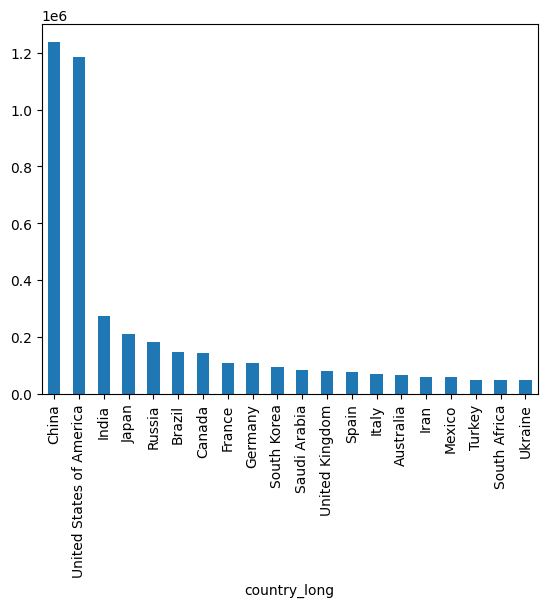

In [272]:
#Generamos grafica de barras con los datos de los 20 primeros paises que mas potencia generan
import matplotlib.pyplot as plt
%matplotlib inline
final=df_ordenado[:20]
# final

final.plot.bar("capacity_mw","name")

In [267]:
#odemos renombrar las columnas con nombres en Español
df3.columns = ['pais', 'nombre', 'capacidad MW', 'latitud', 'longitud', 'combustible','año dato','vida util estimada']
df3

,pais,nombre,capacidad MW,latitud,longitud,combustible,año dato,vida util estimada
0,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.00,32.3220,65.1190,Hydro,2017.0,NaN
1,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.00,34.5560,69.4787,Hydro,2017.0,NaN
2,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.00,34.6410,69.7170,Hydro,2017.0,NaN
3,Afghanistan,Nangarhar (Darunta) Hydroelectric Power Plant ...,11.55,34.4847,70.3633,Hydro,2017.0,NaN
4,Afghanistan,Northwest Kabul Power Plant Afghanistan,42.00,34.5638,69.1134,Gas,2017.0,NaN
...,...,...,...,...,...,...,...,...
28659,Zambia,Ndola,50.00,-12.9667,28.6333,Oil,NaN,120.872642
28660,Zambia,Nkana,20.00,-12.8167,28.2000,Oil,NaN,48.349057
28661,Zambia,Victoria Falls,108.00,-17.9167,25.8500,Hydro,NaN,702.100000
28662,Zimbabwe,Hwange Coal Power Plant Zimbabwe,920.00,-18.3835,26.4700,Coal,2017.0,4397.000000
